<a href="https://colab.research.google.com/github/om7503/Multiple-diseases-prediction-System/blob/main/Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy on Training data:  0.9352226720647774
Accuracy on Test data:  0.9193548387096774


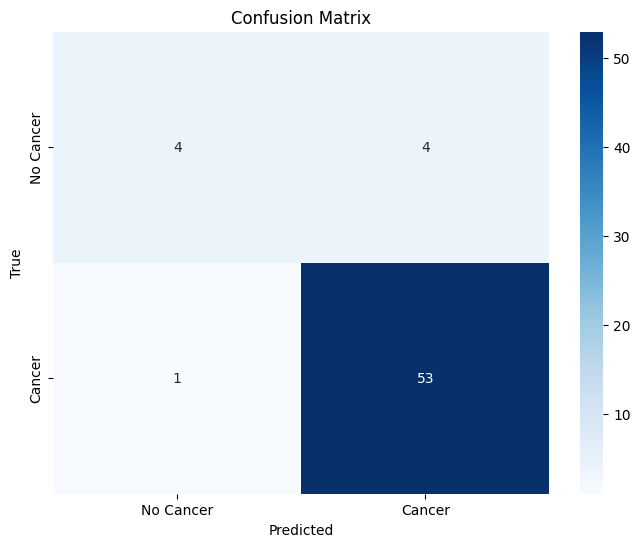

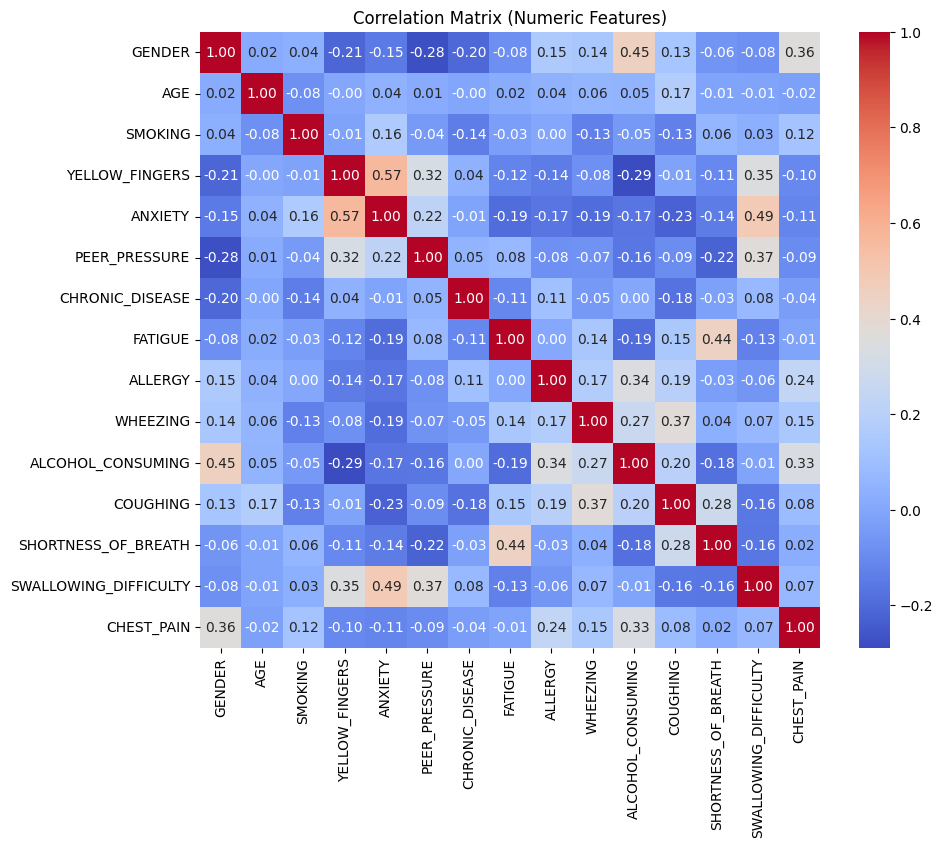

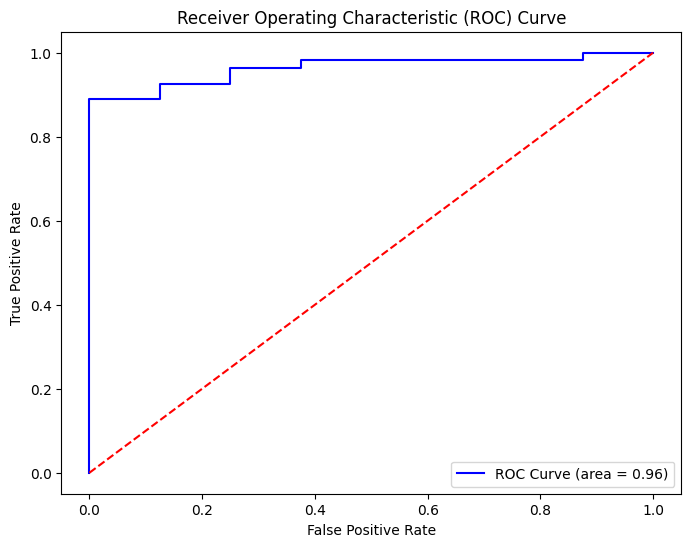

Model saved as 'lung_cancer_model.sav'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib

# Load the dataset
lung_cancer_data = pd.read_csv('/content/survey lung cancer.csv')

# Clean up column names
lung_cancer_data.columns = lung_cancer_data.columns.str.strip().str.replace(' ', '_')

# Update categorical columns
categorical_columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
                       'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                       'COUGHING', 'SHORTNESS_OF_BREATH',
                       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

# Encoding categorical features
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in lung_cancer_data.columns:  # Only encode if the column exists
        lung_cancer_data[col] = label_encoder.fit_transform(lung_cancer_data[col])

# Splitting features and target variable
X = lung_cancer_data.drop(columns='LUNG_CANCER', axis=1)
Y = lung_cancer_data['LUNG_CANCER']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Model Evaluation - Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Print accuracy scores
print('Accuracy on Training data: ', training_data_accuracy)
print('Accuracy on Test data: ', test_data_accuracy)

# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 2: Correlation Matrix (only for numeric features)
plt.figure(figsize=(10, 8))
numeric_columns = lung_cancer_data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Step 3: ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label='YES')  # Adjust pos_label if your target class is 'YES'/'NO'
roc_auc = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Save the model to a .sav file
joblib.dump(model, 'lung_cancer_model.sav')
print("Model saved as 'lung_cancer_model.sav'")
